# SI 618 - Homework #3: Data Visualization

Version 2022.01.30.1.CT

## Background

This homework assignment focuses on the visual analysis of the COVID-19 data avaiable here: https://covid19datahub.io/articles/api/python.html. A description of the dataset can be found at https://covid19datahub.io/articles/doc/data.html

Your main task in this assignment is to explore the data *using the data manipulation, analysis, and visualization methods we covered in class* as well as those in the assigned readings.  You may need to consult pandas, matplotlib and seaborn documentation, as well as Stack Overflow, or other online resources.  

## Total Points and Rubric

Each question is worth the same number of points.  Points will be allocated according to the following rubric:

- 90-100%: Question is correctly and completely answered.  Answer consists of well-written code that conforms to [PEP 8](https://www.python.org/dev/peps/pep-0008/) guidelines and is 
accompanied by a written interpretation in a Markdown block.  Written interpretation does not contain spelling, grammar or stylistic errors (see https://faculty.washington.edu/heagerty/Courses/b572/public/StrunkWhite.pdf for a detailed specifications).  Minor problems, such as formatting, incorrect submissions, missing names, etc. will result in less than 100%.
- 75-85% : Answer is mostly complete and correct; two or fewer noticeable omissions or errors.  Minor stylistic flaws, either in code or in 
written interpretation.
- 50-70%: Answer has significant omissions or errors; Noticeable departure from PEP-8 guildelines and/or moderate spelling, grammar, or style issues
in written interpretations.
- 25-45%: Question is perfunctorily attempted.  Substantial parts are missing or incorrect.
- 0 points: Question not attempted.

## Getting the data


The following cell should install the most up-to-date version of the 
COVID-19 datahub.  Alternatively, you can consult the datahub documentation to download the data files directly.

In [6]:
pip install --upgrade covid19dh

Note: you may need to restart the kernel to use updated packages.


### Restart the kernel to import the module and access the data

In [10]:
from covid19dh import covid19

## Answer the questions below. 
For each question, you should
1. Write code that can help you answer the following questions, and
2. Explain your answers in plain English. You should use complete sentences that would be understood by an educated professional who is not necessarily a data scientist (like a product manager).

In [11]:
# Load all the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [12]:
import warnings
warnings.filterwarnings("ignore")

### <font color='#8B0000'> Q1 How many different countries are represented in the country-level data set?</font>
- Refer to the documentation to call the covid19() function with appropriate parameters (https://covid19datahub.io/articles/api/python.html)

In [5]:
x_country, src_country = covid19(level = 1, verbose = False)

In [295]:
country = x_country.administrative_area_level_1.unique()
country

array(['Saint Lucia', 'Guatemala', 'Guyana', 'Italy', 'Belize',
       'Isle of Man', 'Wallis and Futuna', 'Belarus', 'Solomon Islands',
       'Libya', 'Gambia', 'Haiti', 'Oman', 'San Marino', 'Uzbekistan',
       'Cameroon', 'Turks and Caicos Islands', 'El Salvador', 'Ecuador',
       'Albania', 'Nicaragua', 'Singapore', 'Martinique', 'Guam',
       'Bahamas', 'Myanmar', 'Nepal', 'Bangladesh', 'Zambia', 'Lithuania',
       'Guinea-Bissau', 'Malawi', 'Greenland', 'Belgium', 'Syria',
       'Tajikistan', 'Botswana', 'Hong Kong', 'Mozambique', 'Estonia',
       'Norway', 'Ireland', 'Portugal', 'Jordan', 'South Sudan', 'Kosovo',
       'Korea, South', 'Tonga', 'Spain', 'Grenada', 'Zimbabwe', 'Iceland',
       'Mexico', 'Latvia', 'Rwanda', 'Namibia', 'French Polynesia',
       'Sweden', 'Saudi Arabia', 'Mauritania', 'Jamaica', 'Jersey',
       'Germany', 'Malaysia', 'Yemen', 'Kuwait', 'Cook Islands', 'Iraq',
       'Puerto Rico', 'Papua New Guinea', 'Seychelles', 'Nauru',
       'American

In [290]:
print("Number of different countries: " + str(len(country)))

Number of different countries: 236


In [291]:
import pycountry
world = pycountry.countries
print("Number of all countries in the world: " + str(len(world)))
print("Portion: " + str(len(country) / len(world)))

Number of all countries in the world: 249
Portion: 0.9477911646586346


**Answer.** 
1. There are 236 countries in total which are represented in the country-level dataset according to the definition of the dataset.
1. Using the package `pycountry`, it can be calculated that the number of countries in this dataset takes around 95\% of the number of all countries in the world. However, this result may be not accurate as there are some values listed are regions instead of countries, like Hong Kong and Macao.

### <font color='#8B0000'> Q2 Create a line chart that shows the total number of cases over time.</font>

In [34]:
x_today, src_today = covid19(verbose = False)

<AxesSubplot:title={'center':'Total number of cases over time'}, xlabel='Date', ylabel='Number of confirmed cases'>

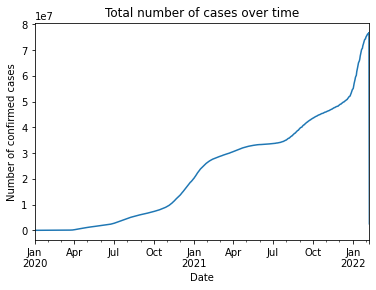

In [35]:
x_today.groupby('date').max().confirmed.plot(title='Total number of cases over time', xlabel='Date', ylabel='Number of confirmed cases')

**Answer.** 
1. From the line chart, it can be seen that COVID-19 confirmed cases began to happen in January, 2020 and continues to show an increasing trend as time goes by.
1. In the first 6 months, the growth of the confirmed cases is slow. Though there are some small flucturations during 2021, the number of cases generally rapidly increases till now.


### <font color='#8B0000'>Q3 Use the country-level data set to create a histogram to:</font>
- Show the distribution of values for the number of hospitalizations per 1000 people.  
- Draw a red vertical line that shows the median value on the histogram.

In [6]:
# Drop the null values in the set
# Groupby countries
x_country_dropna = x_country.dropna(subset=['hosp'])
x_country_dropna.hosp.head()

38908    127.0
38909    150.0
38910    164.0
38911    304.0
38912    409.0
Name: hosp, dtype: float64

Text(0.5, 0.98, 'Number of hospitalizations per 1000 people')

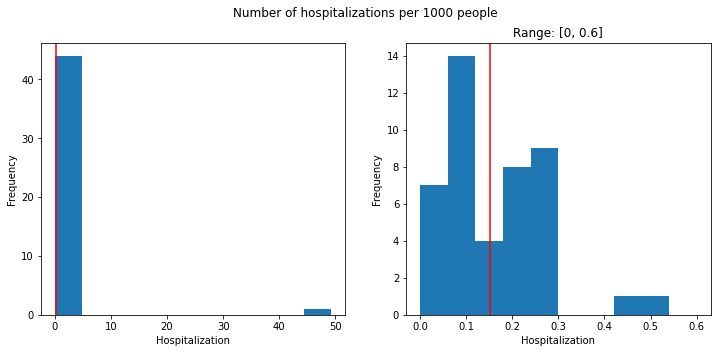

In [7]:
hospitalization = (x_country_dropna.groupby('administrative_area_level_1').sum().hosp.unique() / x_country_dropna.groupby('administrative_area_level_1').sum().population * 1000)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
ax1.hist(hospitalization)
ax1.axvline(x = hospitalization.median(), c = 'red')
ax1.set_xlabel('Hospitalization')
ax1.set_ylabel('Frequency')
ax2.hist(hospitalization, range=[0, 0.6])
ax2.axvline(x = hospitalization.median(), c = 'red')
ax2.set_title('Range: [0, 0.6]')
ax2.set_xlabel('Hospitalization')
ax2.set_ylabel('Frequency')
f.suptitle('Number of hospitalizations per 1000 people')

**Answer.**
1. From the left plot where the result is shown among the total range, it's clear that there exists outliers. Therefore, another plot in the right is plotted which focuses more on the main portion of hospitalizations per 1000 people.
1. Most countries have an hospitalization from 0 to 0.3 and the median value is around 0.15.

### <font color='#8B0000'> Q4 Create a visualization that shows the  number of tests per day in the United States and indicate the median value on your visualization.</font>

In [28]:
# Filter out data in the united states and then show 'tests' per day
usa, usa_src = covid19("USA", verbose = False)

In [31]:
usa_test = usa.groupby('date').tests.max().sort_values(ascending = False)
usa_test

date
2022-02-01    787820796.0
2022-01-31    786473579.0
2022-01-30    785405394.0
2022-01-29    784716090.0
2022-01-28    783594943.0
                 ...     
2022-02-03            NaN
2022-02-04            NaN
2022-02-05            NaN
2022-02-06            NaN
2022-02-07            NaN
Name: tests, Length: 749, dtype: float64

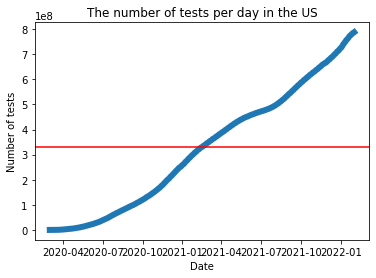

In [32]:
fig,ax = plt.subplots(1)
ax.plot(usa.date, usa.tests, linewidth=6)
ax.set_xlabel('Date')
ax.set_ylabel('Number of tests')
ax.set_title('The number of tests per day in the US')
ax.axhline(usa.tests.median(), c='r')

**Answer.**
1. The number of tests per day in the United States is plotted above. It is clear in the graph that the daily test number shows an increasing trend from 2020 till now.
1. The median value is shown as the red line in the plot. The number of tests per day continues to grow above the median value.

## For questions below:
- You will have to call the covid19() function again **with parameters specific to Canada**. 
- Set the parameter <code>level = 2</code> in the call to covid19().

In [13]:
canada,src = covid19("CAN",level = 2, verbose = False)

In [165]:
canada.tail()

,id,date,confirmed,deaths,recovered,tests,vaccines,people_vaccinated,people_fully_vaccinated,hosp,...,iso_alpha_3,iso_alpha_2,iso_numeric,iso_currency,key_local,key_google_mobility,key_apple_mobility,key_jhu_csse,key_nuts,key_gadm
495065,eef40c88,2022-01-31,5865.0,15.0,4948.0,39692.0,95869.0,NaN,NaN,NaN,...,CAN,CA,124.0,CAD,61,ChIJDcHTs_Q4EVERjVnGRNguMhk,Northwest Territories,CANT,NaN,CAN.6_1
495066,eef40c88,2022-02-01,6073.0,15.0,5117.0,39708.0,96926.0,NaN,NaN,NaN,...,CAN,CA,124.0,CAD,61,ChIJDcHTs_Q4EVERjVnGRNguMhk,Northwest Territories,CANT,NaN,CAN.6_1
495067,eef40c88,2022-02-02,6221.0,15.0,5261.0,39732.0,96926.0,NaN,NaN,NaN,...,CAN,CA,124.0,CAD,61,ChIJDcHTs_Q4EVERjVnGRNguMhk,Northwest Territories,CANT,NaN,CAN.6_1
495068,eef40c88,2022-02-03,6363.0,17.0,5379.0,39782.0,96926.0,NaN,NaN,NaN,...,CAN,CA,124.0,CAD,61,ChIJDcHTs_Q4EVERjVnGRNguMhk,Northwest Territories,CANT,NaN,CAN.6_1
495069,eef40c88,2022-02-04,NaN,NaN,NaN,NaN,96926.0,NaN,NaN,NaN,...,CAN,CA,124.0,CAD,61,ChIJDcHTs_Q4EVERjVnGRNguMhk,Northwest Territories,CANT,NaN,CAN.6_1


### <font color='#8B0000'> Q5 Create a bar plot to show the number of tests conducted in each province.  </font>
Order the provinces from west to east (use your best judgement for cases where the order is unclear).  Which Canadian province that has conducted the most tests?

In [20]:
# groupby province --> show number of tests --> bar plot
can_province = canada.groupby('administrative_area_level_2').tests.max().sort_values(ascending=False)
can_province

administrative_area_level_2
Ontario                      22606233.0
Quebec                       16015314.0
Alberta                       6763655.0
British Columbia              5495428.0
Nova Scotia                   1728364.0
Saskatchewan                  1452358.0
Manitoba                      1434252.0
New Brunswick                  704856.0
Newfoundland and Labrador      551866.0
Prince Edward Island           255565.0
Northwest Territories           39878.0
Nunavut                         32179.0
Yukon                            9129.0
Name: tests, dtype: float64

<AxesSubplot:title={'center':'Conducted test number in each province of Canada'}, xlabel='administrative_area_level_2'>

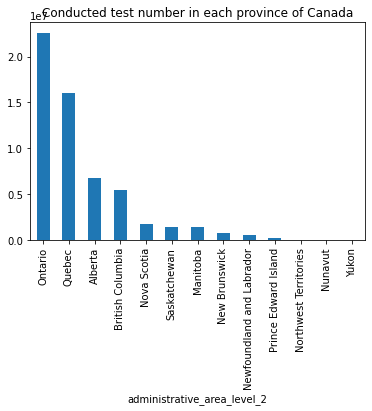

In [21]:
can_province.plot(kind='bar', title='Conducted test number in each province of Canada')

**Answer.**
1. The bar plot of the number of tests conducted in each Canadian province is plotted above. As `tests` records the cumulative number of tests, so here `max` is used for calculation.
1. From the graph, it is clear that Ontario has conducted the most tests.

### <font color='#8B0000'> Q6 Create a bar plot that shows the number of tests conducted per 1000 people for each province in Canada.</font>
How would you interpret the results of this bar plot given the results of bar plot in question 5. 

In [25]:
canada['test_per1000'] = canada.tests / canada.population * 1000
can_testper1000 = canada.groupby('administrative_area_level_2').test_per1000.max().sort_values(ascending=False)
can_testper1000

administrative_area_level_2
Quebec                       1875.840422
Nova Scotia                  1768.225098
Prince Edward Island         1615.884116
Ontario                      1536.602694
Alberta                      1532.615282
Saskatchewan                 1229.076575
British Columbia             1075.233270
Newfoundland and Labrador    1058.502201
Manitoba                     1041.186425
New Brunswick                 903.669648
Northwest Territories         888.072332
Nunavut                       829.783394
Yukon                         222.235747
Name: test_per1000, dtype: float64

<AxesSubplot:title={'center':'The conducted test numer per 1000 people for each province in Canada'}, xlabel='administrative_area_level_2'>

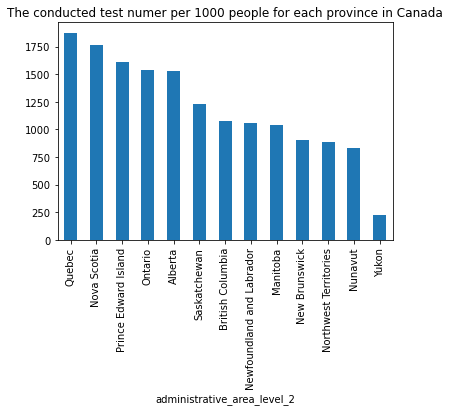

In [26]:
can_testper1000.plot(kind='bar', title='The conducted test numer per 1000 people for each province in Canada')

**Answer.**
1. The above bar plot shows the conducted test number per 1000 people for each Canadian province.
1. From the graph, it is clear that Ontario has conducted the most tests per 1000 people, which is the same province that conducted the most tests. 

### <font color='#8B0000'> Q7 Create a visualization that shows which Canadian province has the highest recovery rate. </font>
Recovery rate is calculated as the number of recovered cases divided by the number of confirmed cases.

In [38]:
# add a series 'Recovery_rate': recovered / confirmed
canada['Recovery_rate'] = canada.recovered / canada.confirmed
canada['Recovery_rate']

3481           NaN
3482           NaN
3483           NaN
3484           NaN
3485           NaN
            ...   
495989    0.852061
495990    0.852061
495991    0.852061
495992    0.865469
495993         NaN
Name: Recovery_rate, Length: 9141, dtype: float64

<AxesSubplot:title={'center':'Recovery rate of each Canadian province'}, xlabel='administrative_area_level_2'>

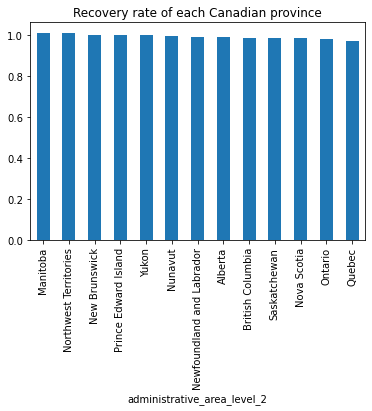

In [40]:
canada.groupby('administrative_area_level_2').Recovery_rate.max().sort_values(ascending=False).plot(kind='bar', title='Recovery rate of each Canadian province')

**Answer.**
To compare the recovery rate of each Canadian province, the bar plot has been generated. As both of `recovered` and `confirmed` record the cumulative values, `max` is used for calculation.

From the plot, it can be seen that Nunavut and Northwest Territories have the highest recovery rate. Also, the recovery rates among all provinces are around 1.0, which shows a good sign of local medical treatments.

### <font color='#8B0000'> Q8 Create visualizations that show the impacts of _at least_ three policy measures on mortality or infection rates.</font>


See https://covid19datahub.io/articles/doc/data.html for descriptions of the available policy measures.  You are not limited to histograms and bar charts.  Remember that you can use subplots!


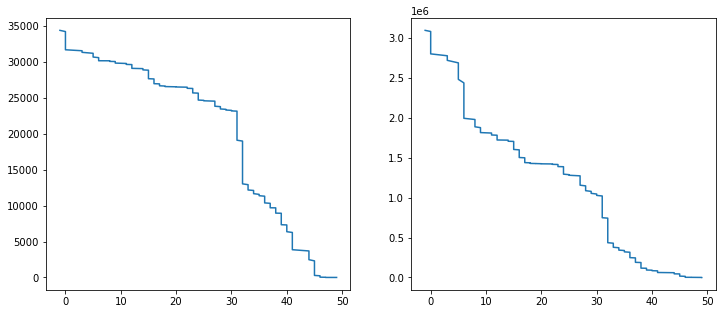

In [395]:
# Measure 1: gatherings_restrictions on 'deaths' and 'confirmed'
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(canada.groupby('date').gatherings_restrictions.sum().sort_values(ascending=False), canada.groupby('date').deaths.sum().sort_values())
ax2.plot(canada.groupby('date').gatherings_restrictions.sum().sort_values(ascending=False), canada.groupby('date').confirmed.sum().sort_values())
plt.show()

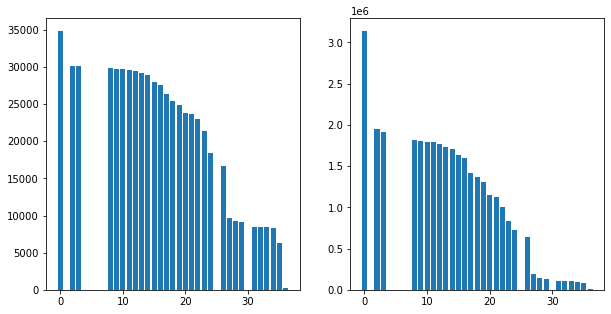

In [19]:
# Measure 2: facial_coverings on 'deaths' and 'confirmed'
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.bar(canada.groupby('date').facial_coverings.sum().sort_values(ascending=False), canada.groupby('date').deaths.sum().sort_values())
ax2.bar(canada.groupby('date').facial_coverings.sum().sort_values(ascending=False), canada.groupby('date').confirmed.sum().sort_values())
plt.show()

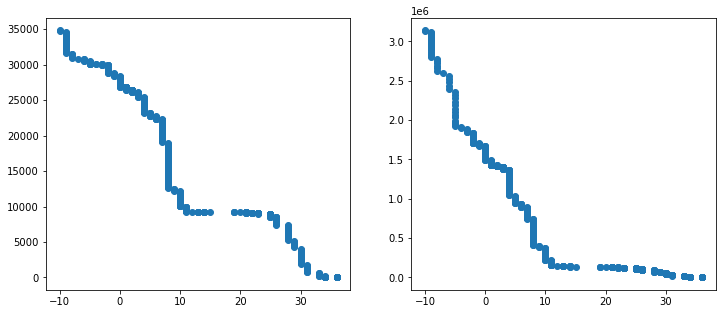

In [14]:
# Measure 3: vaccination_policy on 'deaths' and 'confirmed'
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.scatter(canada.groupby('date').school_closing.sum().sort_values(ascending=False), canada.groupby('date').deaths.sum().sort_values())
ax2.scatter(canada.groupby('date').school_closing.sum().sort_values(ascending=False), canada.groupby('date').confirmed.sum().sort_values())
plt.show()

**Answer.**
For this question, `facial_coverings`, `gatherings_restrictions` and `vaccination_policy` are analyzed to show their impacts on mortality and infection rates. All the graphs show that with more and more implementations of the three policy measures, the number of deaths and confirmed cases become fewer and fewer.

## <font color='green'> Please submit your completed notebook in .IPYNB and .HTML formats via Canvas </font>